In [1]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [0]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

import pickle 

import spacy 

In [3]:
df = pd.read_csv("symptom_training.csv", index_col='ID')

# df['symptom_num'] = df['Symptom'].map({'Depression':0, 'Stress':1, 'Lack of Appetite':2, 'Pain':3, 'Nausea':4, 'Insomnia':5, 
#                         'Fatigue':13, 'Cramps':6, 'Headaches':7, 'Inflammation':8, 'Eye Pressure':9, 'Muscle Spasms':10,
#                         'Spasticity':11, 'Seizures':12})

df = df.dropna()

df.head()

,Symptom,Query
ID,,
0,Depression,I feel sad all the time.
1,Depression,I'm always melancholy
2,Depression,I am depressed.
3,Depression,Nothing is fun anymore
4,Depression,I feel like I have depression.


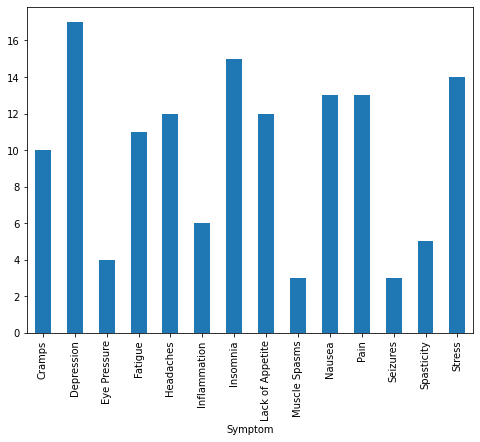

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Symptom').Query.count().plot.bar(ylim=0)
plt.show()

In [0]:
import en_core_web_lg

nlp = en_core_web_lg.load()

# nlp = spacy.load('en_core_web_lg')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['Query'], df['Symptom'], random_state = 0)
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(X_train)
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [7]:
clf = Pipeline([
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('nb', MultinomialNB()),
                ])
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [8]:
clf.predict(["My head hurts."])

array(['Headaches'], dtype='<U16')

In [9]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.5142857142857142


In [10]:
print(classification_report(y_pred, y_test))

                  precision    recall  f1-score   support

          Cramps       0.50      1.00      0.67         1
      Depression       0.40      0.50      0.44         4
    Eye Pressure       0.00      0.00      0.00         0
         Fatigue       0.33      0.50      0.40         2
       Headaches       0.67      0.67      0.67         3
        Insomnia       0.60      0.43      0.50         7
Lack of Appetite       1.00      0.75      0.86         4
   Muscle Spasms       0.00      0.00      0.00         0
          Nausea       0.50      0.20      0.29         5
            Pain       1.00      0.50      0.67         6
        Seizures       0.00      0.00      0.00         0
      Spasticity       0.00      0.00      0.00         0
          Stress       0.40      0.67      0.50         3

        accuracy                           0.51        35
       macro avg       0.42      0.40      0.38        35
    weighted avg       0.65      0.51      0.55        35



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
pickle.dump(clf, open("model.p", "wb")) 
clf_from_pickle = pickle.load(open("model.p", "rb"))

In [13]:
test_input = "I can't go to sleep."
test_output = str(clf_from_pickle.predict([test_input])[0])

print(test_output)

Insomnia
